In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
models = ['baseline', 'rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [4]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['mean'], 
                    "sys_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['std'], 
                    "sys_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['max'], 
                    "sys_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%sys']['min'],
                    "mem_mean" : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['mean'], 
                    "mem_std"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['std'], 
                    "mem_max"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['max'], 
                    "mem_min"  : df[features].replace(',','.',regex=True).astype(float).describe()['%memused']['min']
                  }


In [5]:
df.columns.values

array(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice',
       '%sys', '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice',
       '%idle[...]', 'kbmemfree', 'kbavail', 'kbmemused', '%memused',
       'kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive',
       'kbinact', 'kbdirty', 'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl',
       'kbvmused', 'IFACE', 'rxpck/s', 'txpck/s', 'rxkB/s', 'txkB/s',
       'rxcmp/s', 'txcmp/s', 'rxmcst/s', '%ifutil[...]', 'IFACE.1',
       'rxerr/s', 'txerr/s', 'coll/s', 'rxdrop/s', 'txdrop/s', 'txcarr/s',
       'rxfram/s', 'rxfifo/s', 'txfifo/s[...]', 'call/s', 'retrans/s',
       'read/s', 'write/s', 'access/s', 'getatt/s', 'scall/s',
       'badcall/s', 'packet/s', 'udp/s', 'tcp/s', 'hit/s', 'miss/s',
       'sread/s', 'swrite/s', 'saccess/s', 'sgetatt/s', 'totsck',
       'tcpsck', 'udpsck', 'rawsck', 'ip-frag', 'tcp-tw', 'irec/s',
       'fwddgm/s', 'idel/s', 'orq/s', 'asmrq/s', 'asmok/s', 'fragok/s',
       'fragcrt/s', 'ihd

In [6]:
# features with variance greater than zero
m=df.var()>0
df_filtered = df.loc[:, m.reindex(df.columns, axis=1, fill_value=False)]
df_filtered.columns.values

array(['kbmemfree', 'kbavail', 'kbmemused', 'kbbuffers', 'kbcached',
       'kbcommit', 'kbactive', 'kbinact', 'kbdirty', 'kbanonpg', 'kbslab',
       'kbkstack', 'kbpgtbl', 'kbvmused', 'totsck', 'tcp6sck'],
      dtype=object)

In [7]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [8]:
plt.style.use('plot_style.txt')

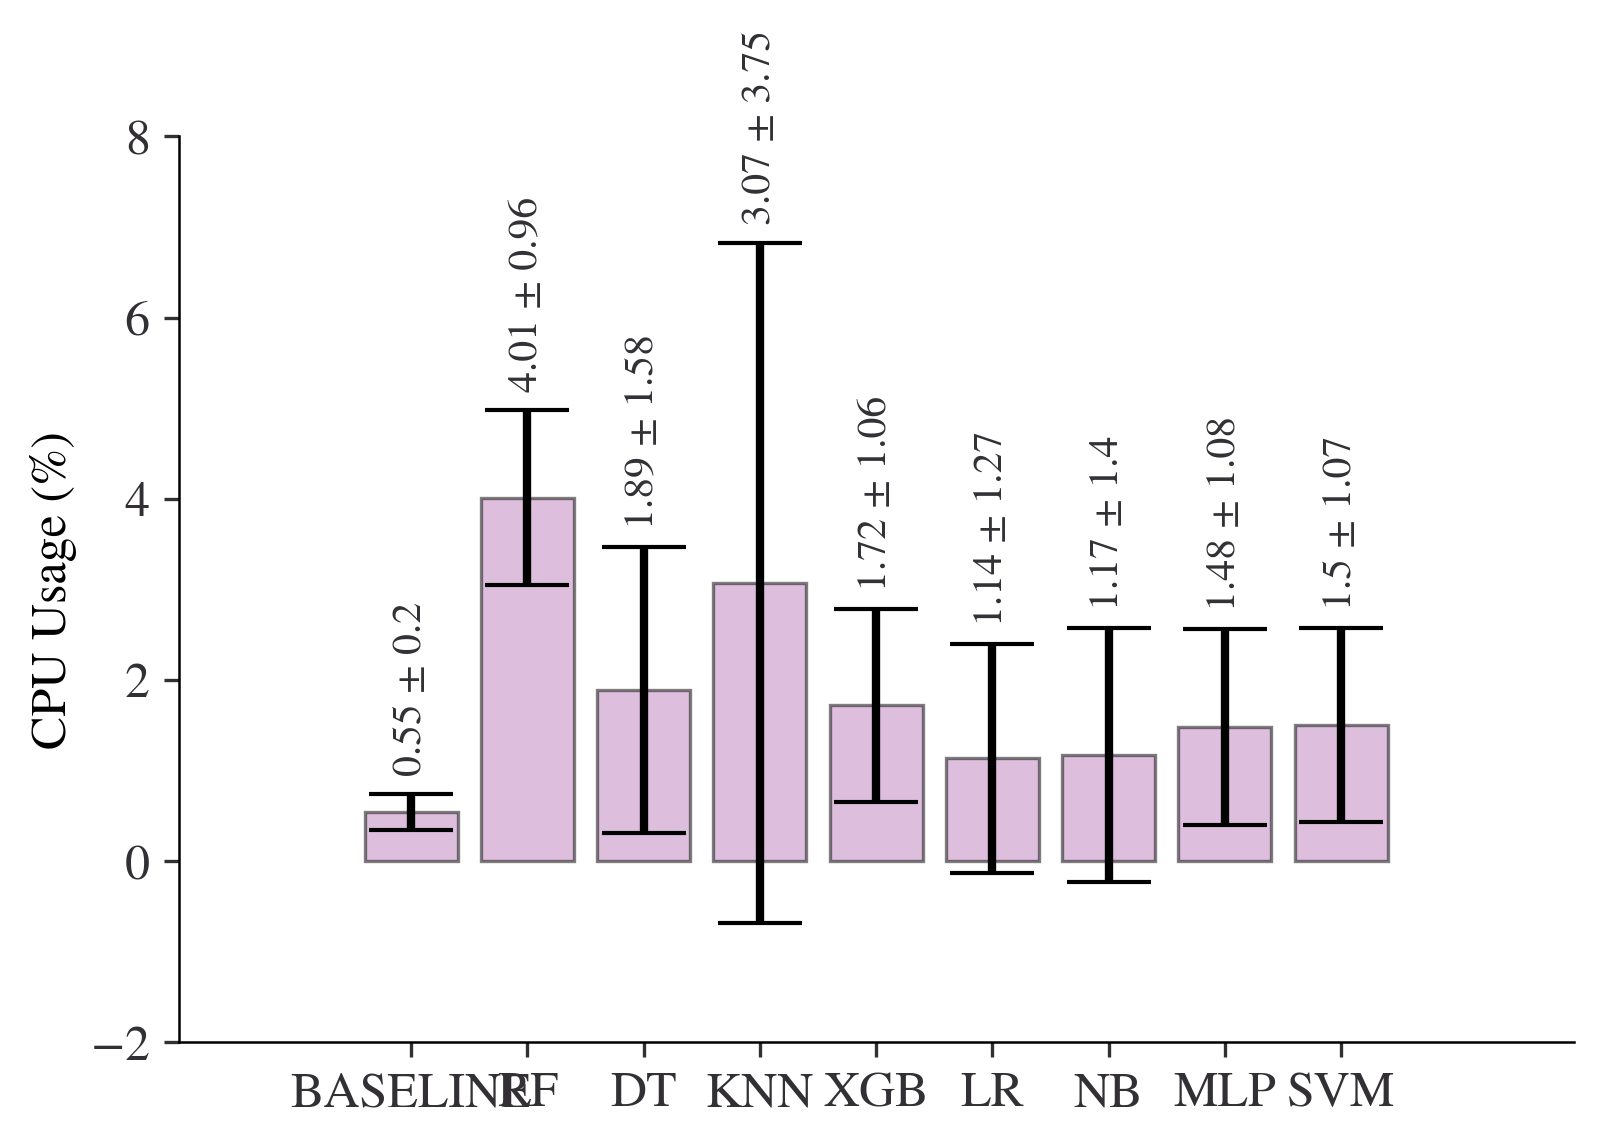

In [9]:
import os
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(sys_mean)):
    plt.text(i, sys_mean[i]+sys_std[i]+0.2, str(round(sys_mean[i],2))+" ± "+str(round(sys_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

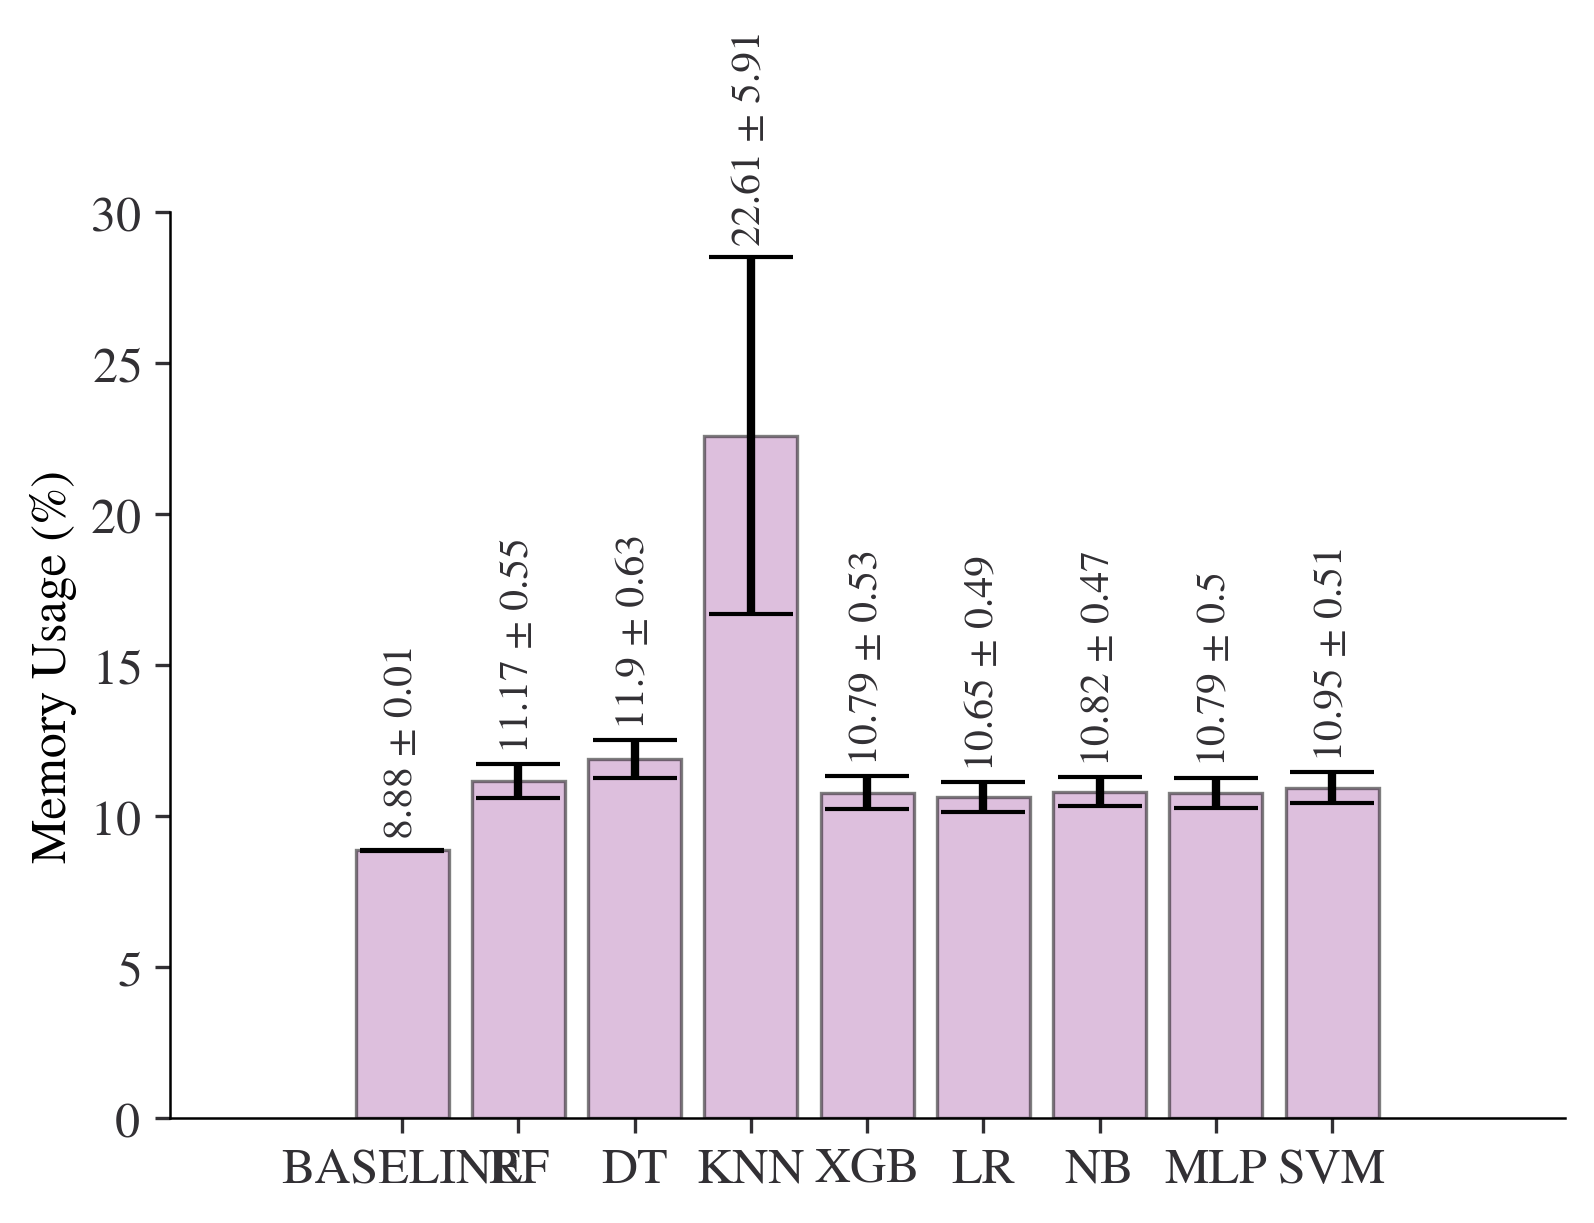

In [10]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(mem_mean)):
    plt.text(i, mem_mean[i]+mem_std[i]+0.4, str(round(mem_mean[i],2))+" ± "+str(round(mem_std[i],2)), ha="center", va="bottom", rotation=90)
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---

## Violin and Boxplot

In [11]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys" : df[features]['%sys'].replace(',','.',regex=True).astype(float), 
                    "mem" : df[features]['%memused'].replace(',','.',regex=True).astype(float), 
                  }


In [12]:
data

{'baseline': {'sys': 0     0.50
  1     0.50
  2     0.50
  3     0.50
  4     0.75
  5     0.50
  6     1.00
  7     0.25
  8     0.75
  9     0.25
  10    0.50
  11    0.75
  12    0.50
  13    0.50
  14    0.75
  15    0.50
  16    0.75
  17    0.25
  18    0.50
  19    0.50
  20    0.75
  21    0.25
  Name: %sys, dtype: float64,
  'mem': 0     8.88
  1     8.88
  2     8.88
  3     8.88
  4     8.88
  5     8.88
  6     8.87
  7     8.87
  8     8.87
  9     8.87
  10    8.87
  11    8.87
  12    8.87
  13    8.87
  14    8.87
  15    8.87
  16    8.88
  17    8.88
  18    8.88
  19    8.88
  20    8.88
  21    8.88
  Name: %memused, dtype: float64},
 'rf': {'sys': 0     4.74
  1     3.29
  2     4.26
  3     2.75
  4     0.75
  5     4.55
  6     4.53
  7     3.54
  8     3.81
  9     4.01
  10    4.52
  11    3.77
  12    4.07
  13    4.79
  14    3.75
  15    3.29
  16    5.28
  17    4.25
  18    4.52
  19    5.26
  20    4.06
  21    4.53
  Name: %sys, dtype: float64,
  'mem':

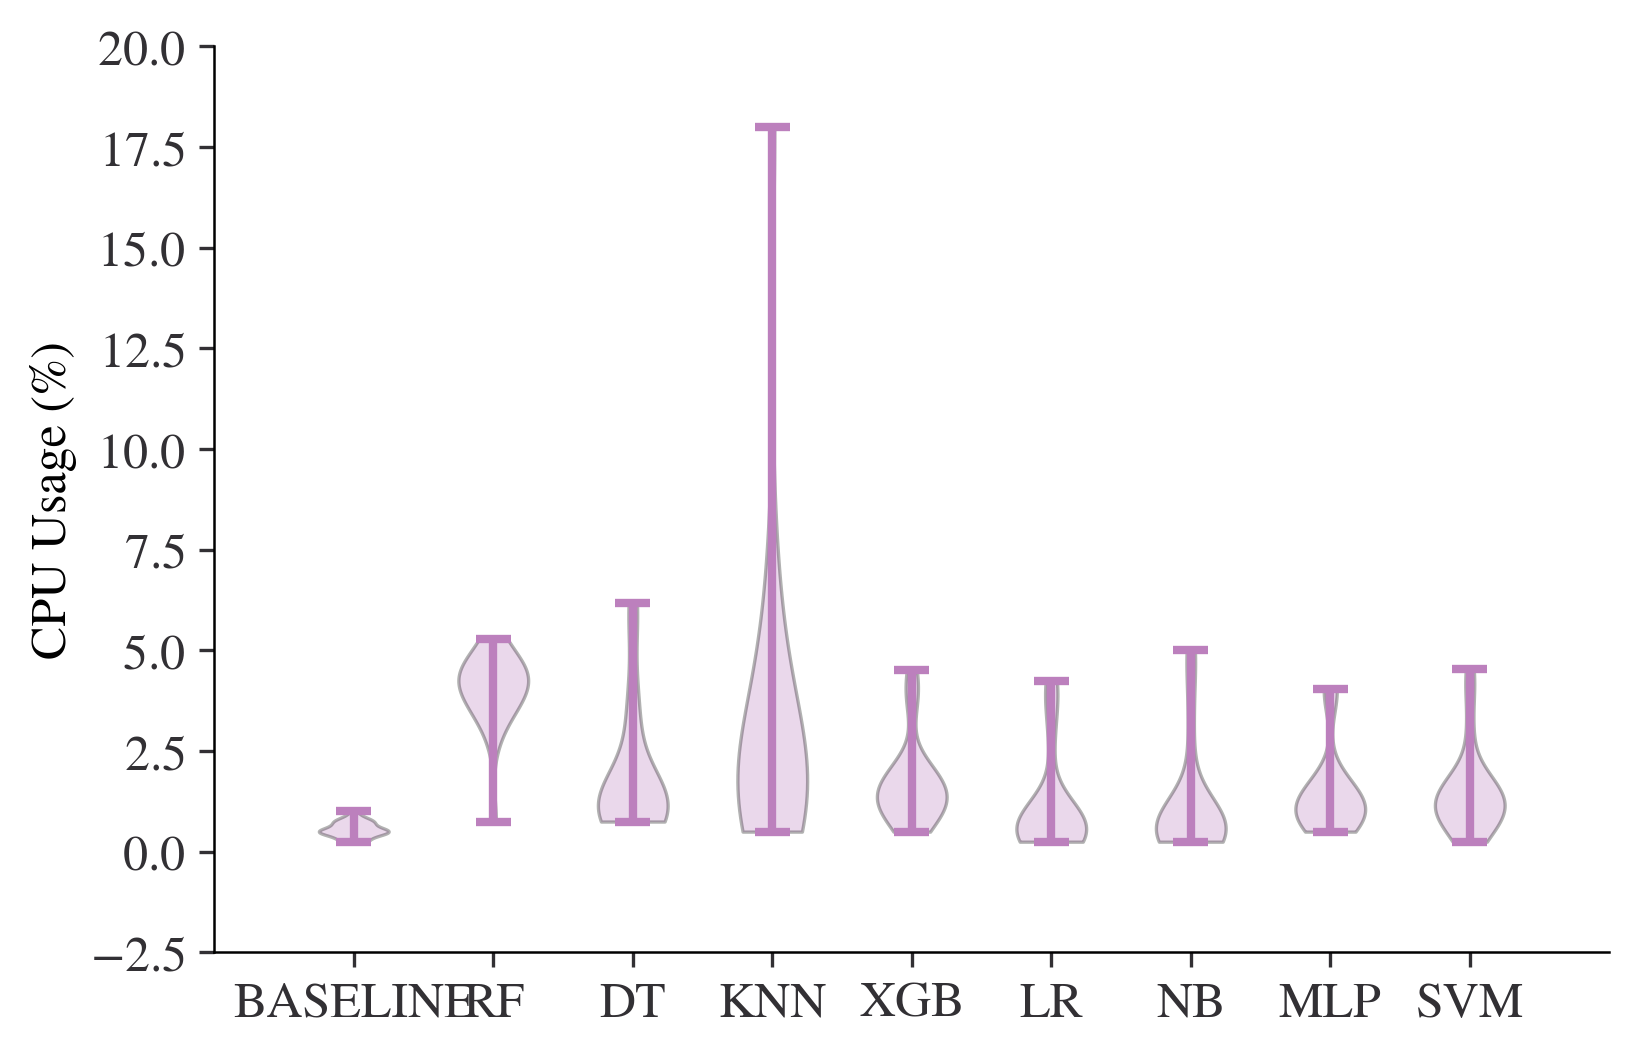

In [13]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.violinplot(plot_sys);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

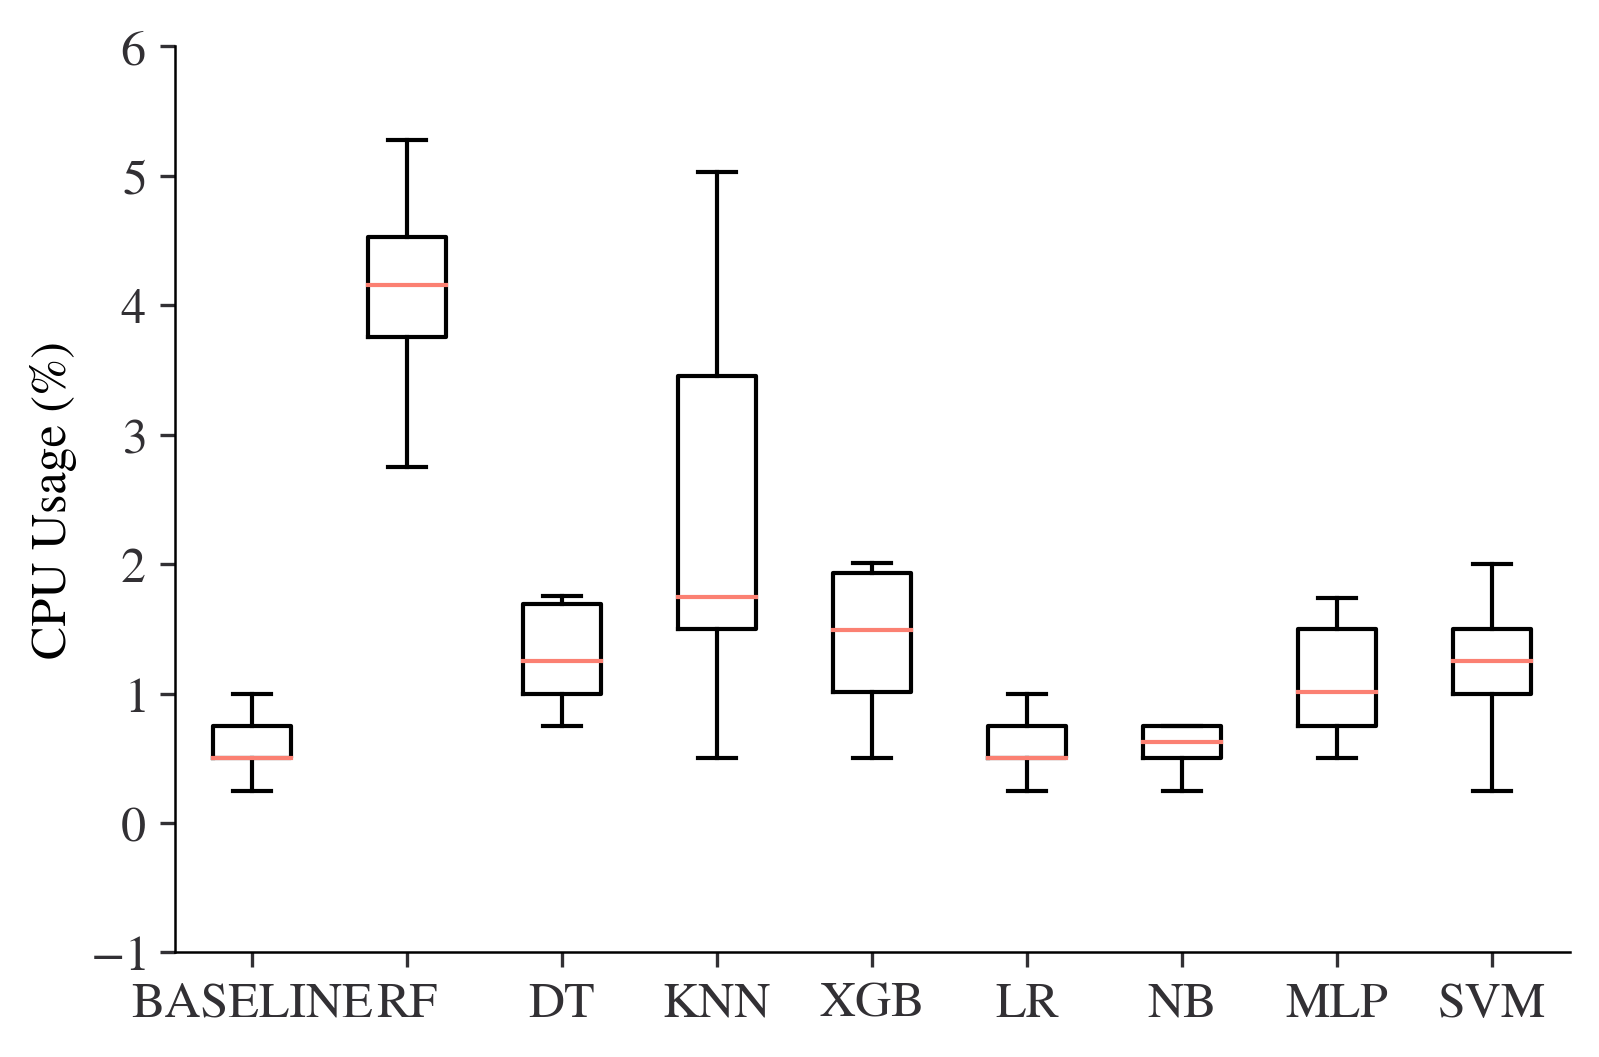

In [14]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.boxplot(plot_sys, showfliers=False);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

In [15]:
[model.upper() for model in models]

['BASELINE', 'RF', 'DT', 'KNN', 'XGB', 'LR', 'NB', 'MLP', 'SVM']

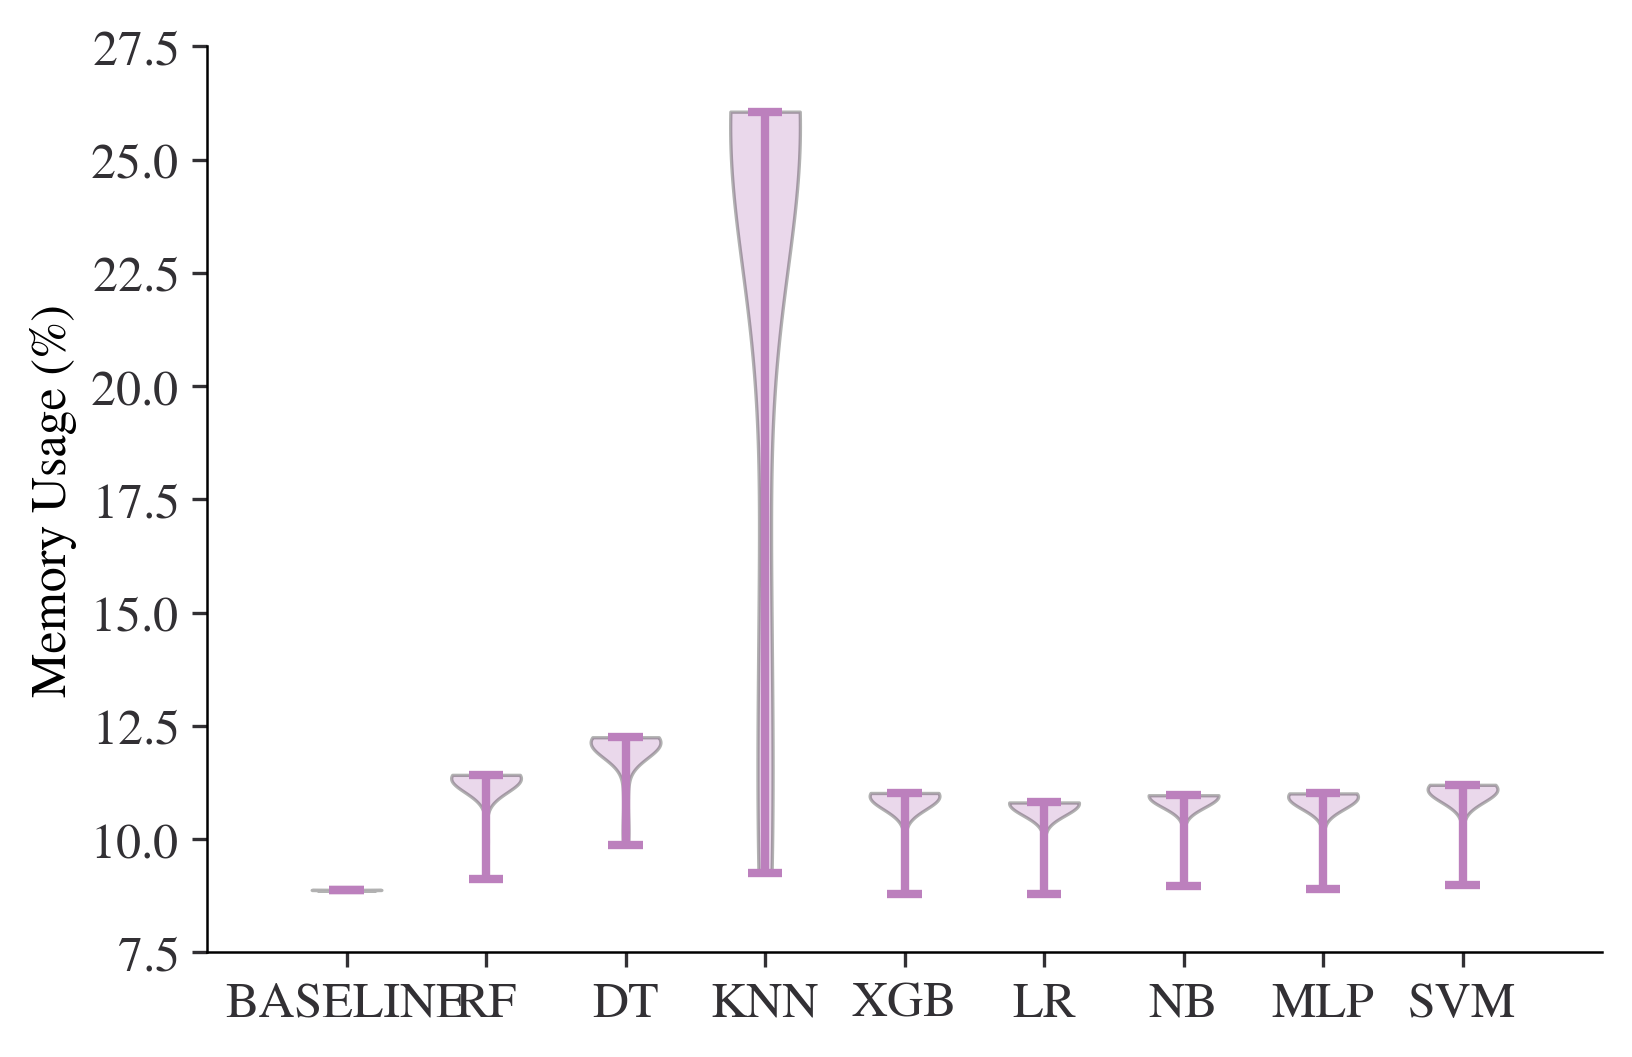

In [16]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.violinplot(plot_mem);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

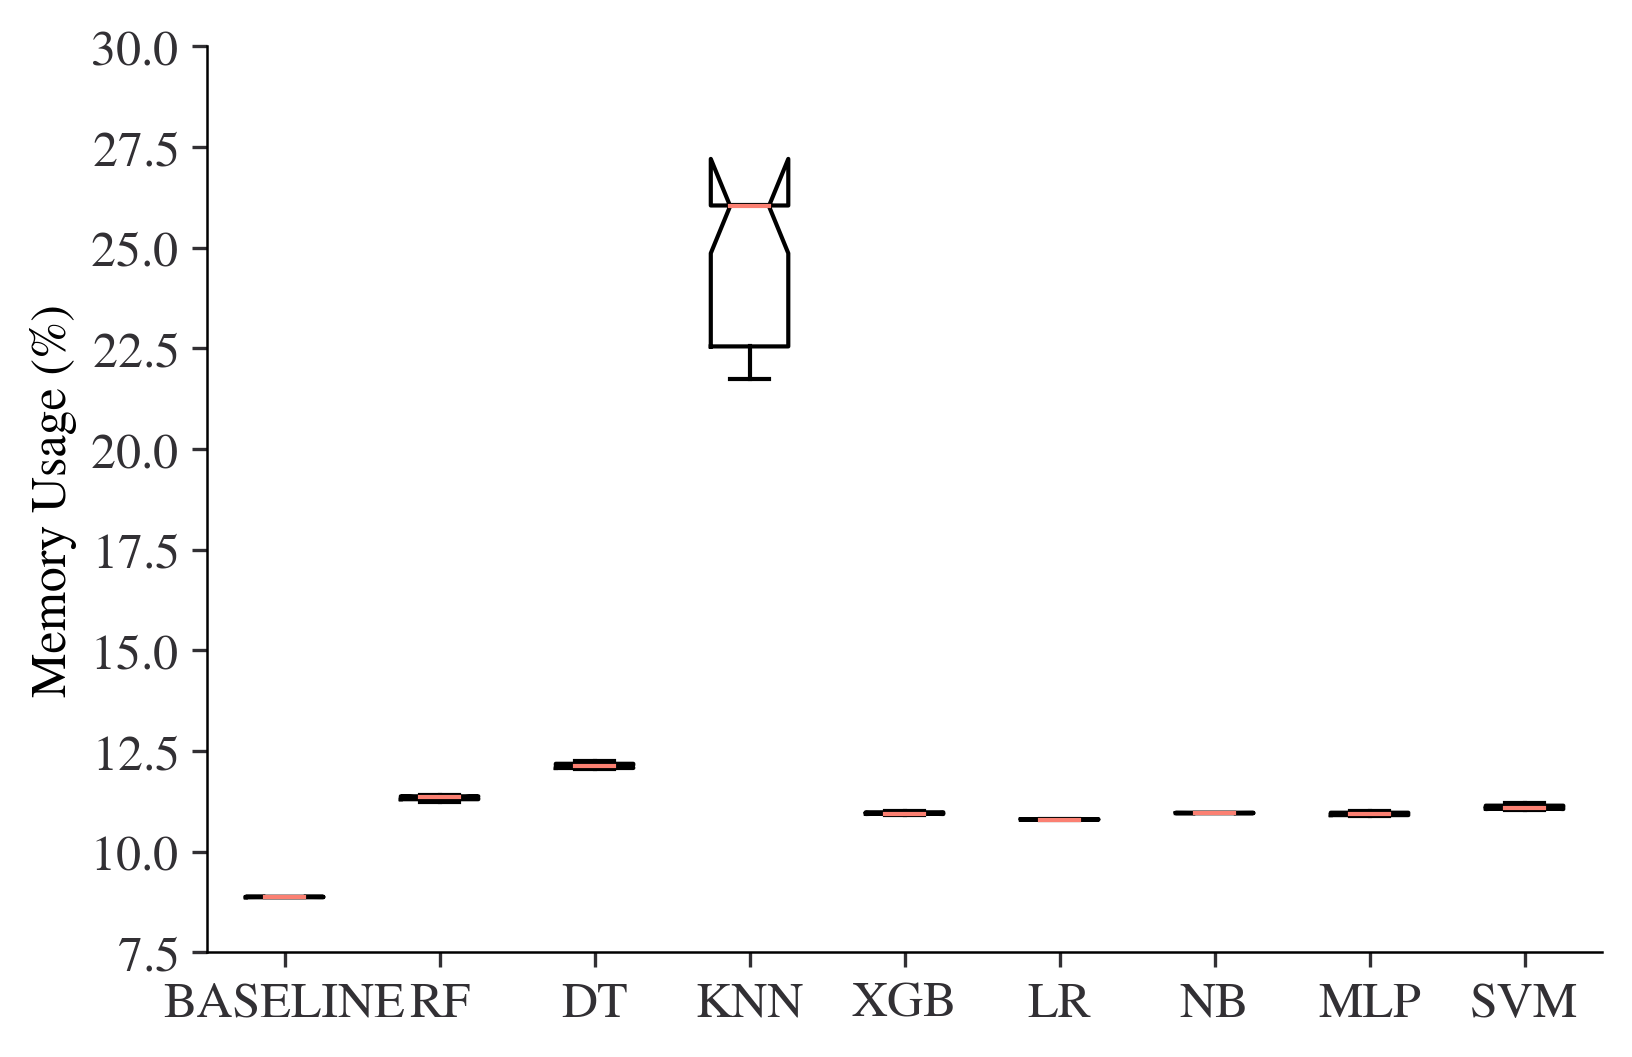

In [17]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.boxplot(plot_mem, showfliers=False, notch=True);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---
## Confidence Interval

In [18]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [19]:
for metric in ['sys', 'mem']:
    for model in models:
        mean, bottom, top = mean_confidence_interval(data[model][metric])
        print(metric, model, mean, bottom, top, (mean>bottom and mean<top))

sys baseline 0.5454545454545454 0.45733306064234647 0.6335760302667444 True
sys rf 4.014545454545455 3.5880314822602455 4.441059426830663 True
sys dt 1.89 1.188624563918319 2.5913754360816807 True
sys knn 3.0704545454545453 1.4068481658617351 4.7340609250473555 True
sys xgb 1.7190909090909088 1.2470445060244553 2.191137312157362 True
sys lr 1.135909090909091 0.5744105868714822 1.6974075949466998 True
sys nb 1.1718181818181819 0.5505011113888689 1.7931352522474948 True
sys mlp 1.4804545454545452 1.0001386442159867 1.9607704466931037 True
sys svm 1.502727272727273 1.0278332923803024 1.9776212530742434 True
mem baseline 8.875454545454543 8.873194896396738 8.877714194512349 True
mem rf 11.17181818181818 10.927095302588715 11.416541061047646 True
mem dt 11.896363636363638 11.617104166056444 12.175623106670832 True
mem knn 22.605909090909094 19.98466280181225 25.22715538000594 True
mem xgb 10.789545454545454 10.553285394620504 11.025805514470404 True
mem lr 10.646818181818185 10.429569151198

---
# Violin plots + Boxplot

In [20]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals.iloc[-1]) # replaced [-1] by iloc[-1] for being Pandas Series

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

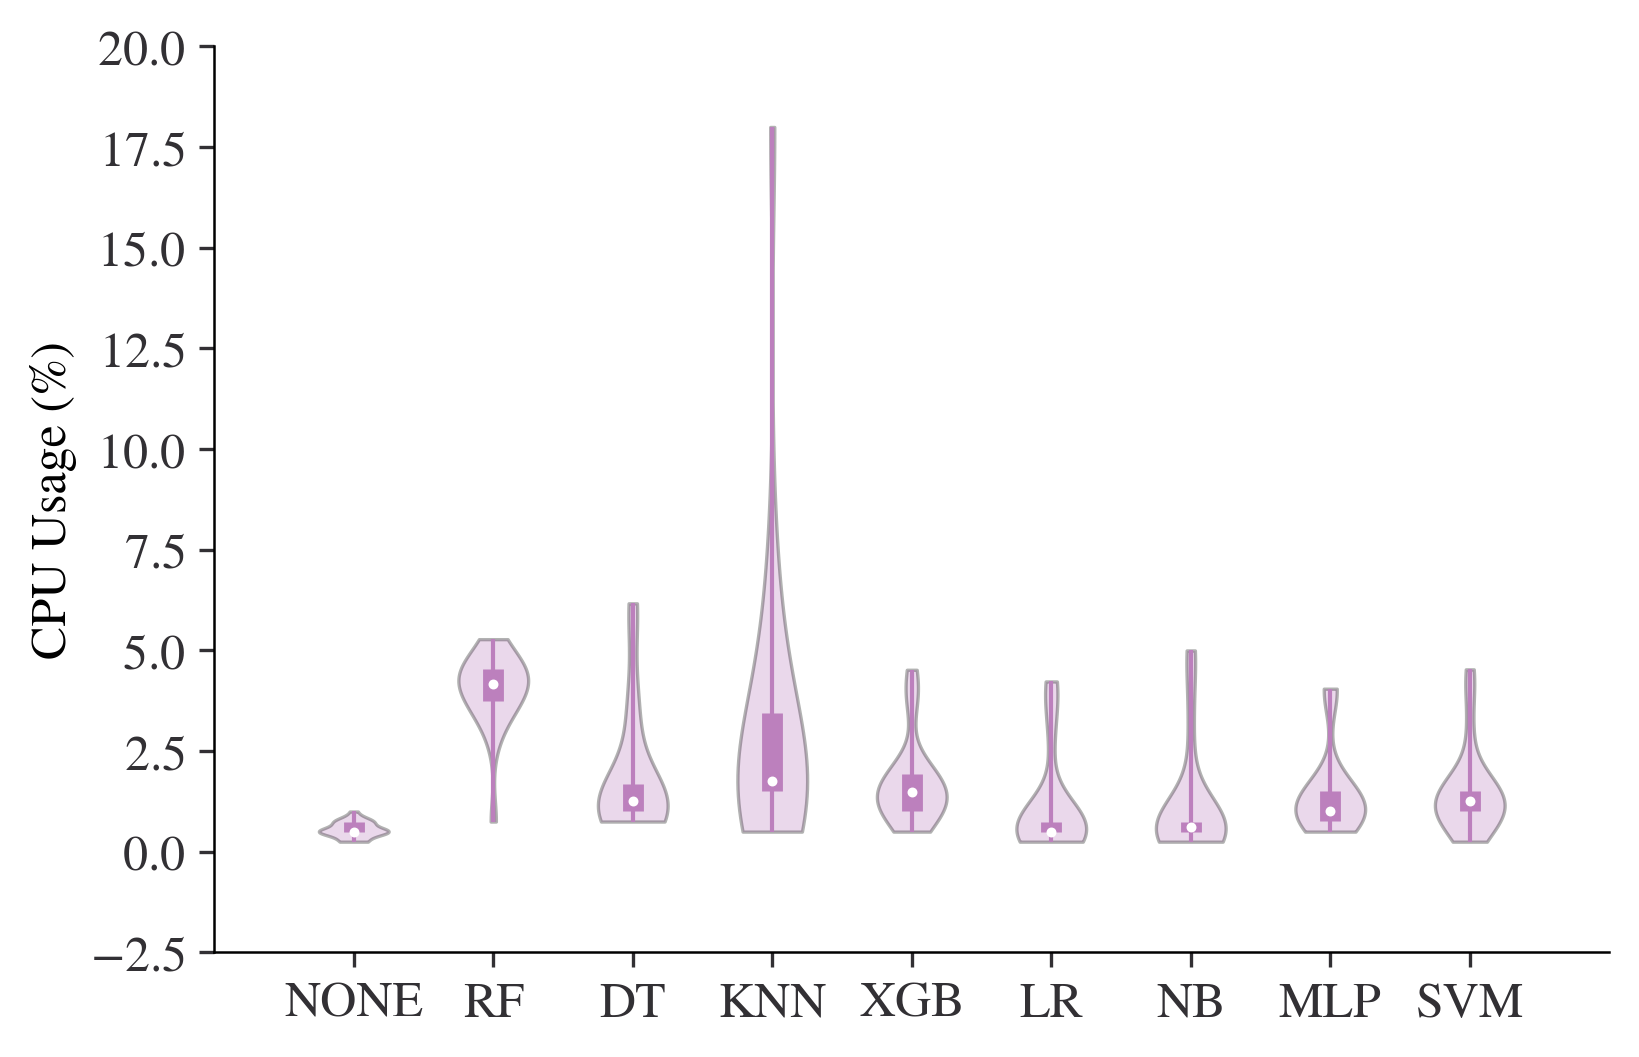

In [21]:
import numpy as np

plot_sys = []

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')

parts = ax.violinplot(
        plot_sys, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_sys, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_sys, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_sys]
whiskers_max = [i.max() for i in plot_sys]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

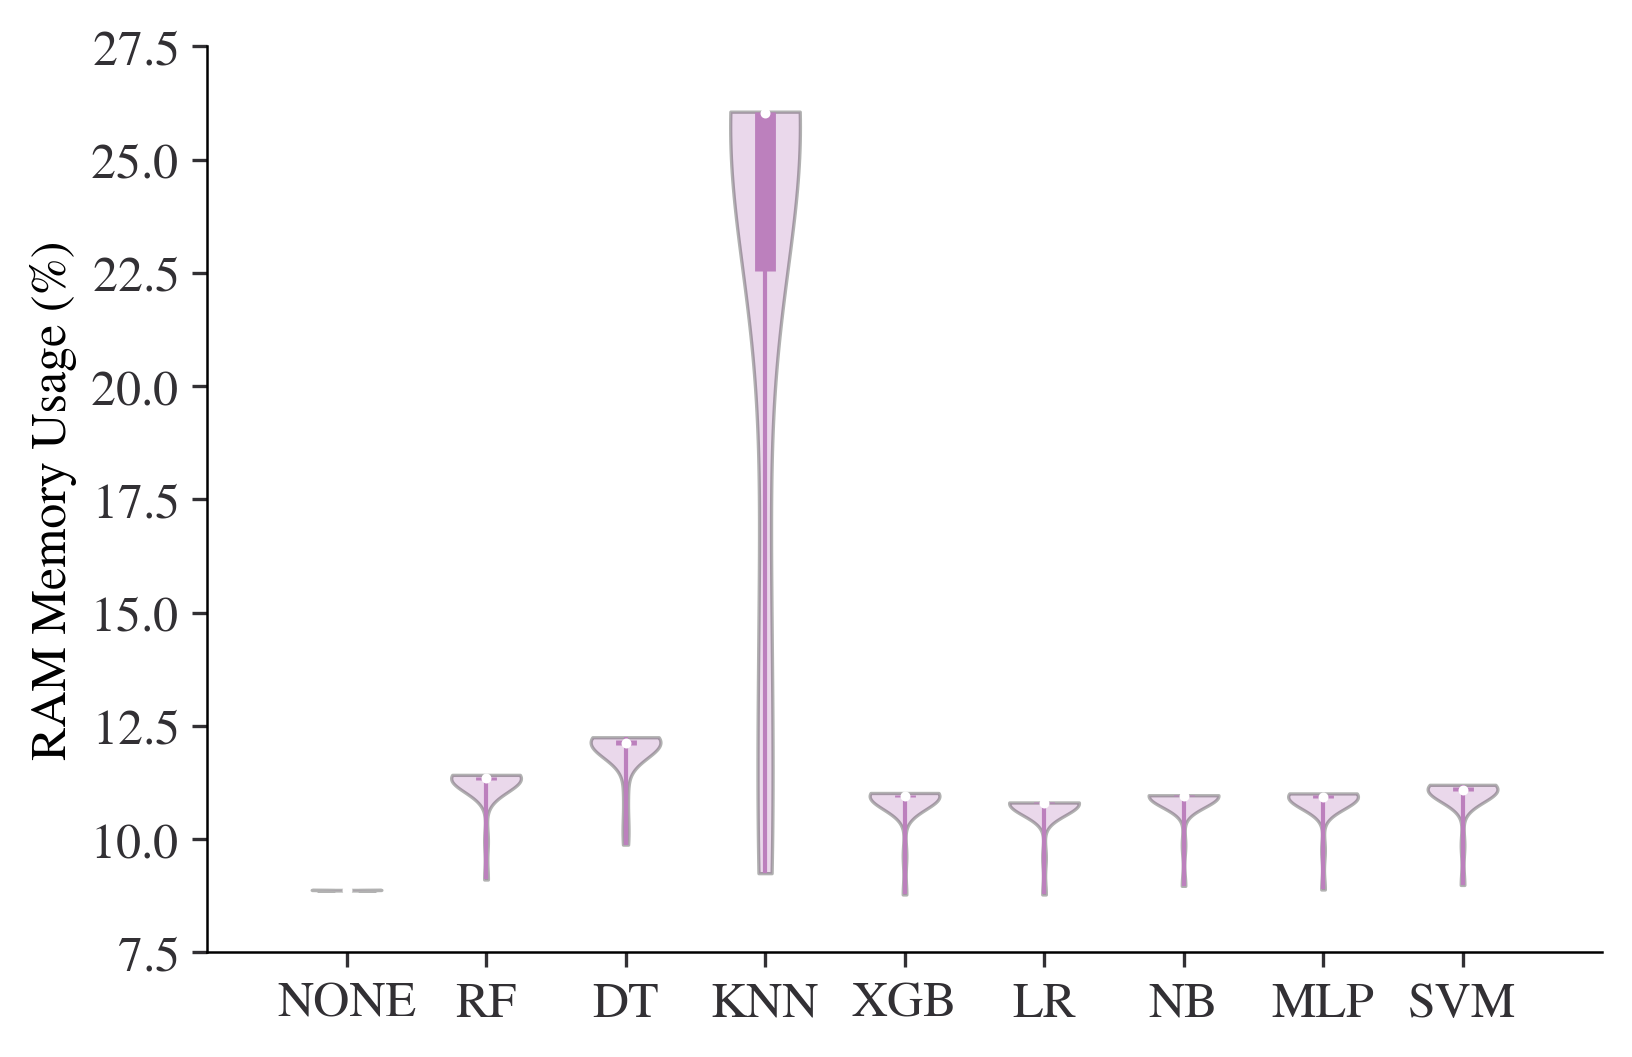

In [22]:
import numpy as np

plot_mem = []

for i, model in enumerate(models):
    if model == "none":
        models[i] = "baseline"

x_pos = np.arange(len(models))

fig, ax = plt.subplots()

for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('RAM Memory Usage (%)')

parts = ax.violinplot(
        plot_mem, showmeans=False, showmedians=False,
        showextrema=False)

#for pc in parts['bodies']:
    #pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    #pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(plot_mem, [25, 50, 75], axis=1)

whiskers = np.array([adjacent_values(sorted_array, q1, q3) 
                     for sorted_array, q1, q3 in zip(plot_mem, quartile1, quartile3)])
#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min = [i.min() for i in plot_mem]
whiskers_max = [i.max() for i in plot_mem]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='.', color='white', s=10, zorder=3)
ax.vlines(inds, quartile1, quartile3, linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, linestyle='-', lw=1)

for i, model in enumerate(models):
    if model == "baseline":
        models[i] = "none"

plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin_plus_box.pdf'), dpi=300, bbox_inches = "tight")
plt.show()